# RSD Power Spectrum to Correlation Function

https://wwwmpa.mpa-garching.mpg.de/~komatsu/lecturenotes/Shun_Saito_on_RSD.pdf...

In [1]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 6.8 MB/s 
     |████████████████████████████████| 88 kB 6.2 MB/s 
     |████████████████████████████████| 85 kB 2.5 MB/s 
     |████████████████████████████████| 85 kB 3.4 MB/s 
     |████████████████████████████████| 82 kB 263 kB/s 
     |████████████████████████████████| 75 kB 2.9 MB/s 
     |████████████████████████████████| 75 kB 3.3 MB/s 
     |████████████████████████████████| 75 kB 1.5 MB/s 
     |████████████████████████████████| 70 kB 3.9 MB/s 
     |████████████████████████████████| 71 kB 5.9 MB/s 
     |████████████████████████████████| 69 kB 6.0 MB/s 
     |████████████████████████████████| 67 kB 4.1 MB/s 
     |████████████████████████████████| 67 kB 2.1 MB/s 
     |████████████████████████████████| 67 kB 3.6 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 40 kB 4.8 MB/s 
ERROR

In [2]:
pip install mcfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for mcfit: filename=mcfit-0.0.17-py3-none-any.whl size=10858 sha256=71a477effec5209021cabb0592d37ee836163f1565b97d10e5ee79ae705e88aa
  Stored in directory: /root/.cache/pip/wheels/3b/4a/45/383db52697a519c19fd8988cb9405b5022e566c1490c0ed56a
Successfully built mcfit


In [3]:
pip install camb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 19.6 MB/s 
  Created wheel for camb: filename=camb-1.3.6-py3-none-any.whl size=1044377 sha256=4f6b5c7e1e16fb0b18a839453fe5504a84d73c9a38894e229746a8e23bd73e30
  Stored in directory: /root/.cache/pip/wheels/c9/76/04/75619eee19c9e79112912a0548350ca594a64266277a7eb2da
Successfully built camb


In [4]:
pip install nbodykit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 302 kB 16.9 MB/s 
     |████████████████████████████████| 2.5 MB 42.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 35.0 MB/s 
     |████████████████████████████████| 204 kB 42.3 MB/s 
  Using cached mpsort-0.1.17.tar.gz (88 kB)
  Using cached mpsort-0.1.16.tar.gz (88 kB)
  Using cached mpsort-0.1.15.tar.gz (85 kB)
  Using cached mpsort-0.1.14.tar.gz (85 kB)
  Using cached mpsort-0.1.13.tar.gz (82 kB)
  Using cached mpsort-0.1.12.tar.gz (75 kB)
  Using cached mpsort-0.1.11.tar.gz (75 kB)
  Using cached mpsort-0.1.10.tar.gz (75 kB)
  Using cached mpsort-0.1.9.tar.gz (70 kB)
  Using cached mpsort-0.1.8.tar.gz (71 kB)
  Using cached mpsort-0.1.7.tar.gz (69 kB)
  Using cached mpsort-0.1.4.tar.gz (67 kB)
  Using cached mpso

In [5]:
import mcfit

In [6]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.special import legendre
import camb
from camb import model
import matplotlib.pyplot as plt
import os.path as op

In [7]:
# Same as CAMB demo
h =.675
H0 = 100*h
ombh2 = 0.022
omch2 = 0.122
mnu = 0.06
omk = 0.
tau = 0.06
As = 2e-9
ns = 0.965
r = 0.

# Saito gives the following numbers for a roughly BOSS-CMASS-like sample
f = 0.774
b = 2.
z = 0.57

# From CAMB demo again
kmin = 1e-5
kmax = 1.
nk = 500

# Setting this myself
nmu = 1000
mu = np.arange(-1.,1.,1./nmu)

In [8]:


# Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
# This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, mnu=mnu, omk=omk, tau=tau)
pars.InitPower.set_params(As=As, ns=ns, r=r)

# Calculate results for these parameters
results = camb.get_results(pars)

# Now get matter power spectra and sigma8 at redshift 0 and 0.8
# Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0., z], kmax=2)

# Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, zs, pk = results.get_matter_power_spectrum(minkh=kmin, maxkh=kmax, npoints=nk)
s8 = np.array(results.get_sigma8())

# Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=kmin, maxkh=kmax, npoints=nk)

# Print some stuff out
print()
print(results.get_sigma8())



Note: redshifts have been re-sorted (earliest first)

[0.59559072 0.8025233 ]


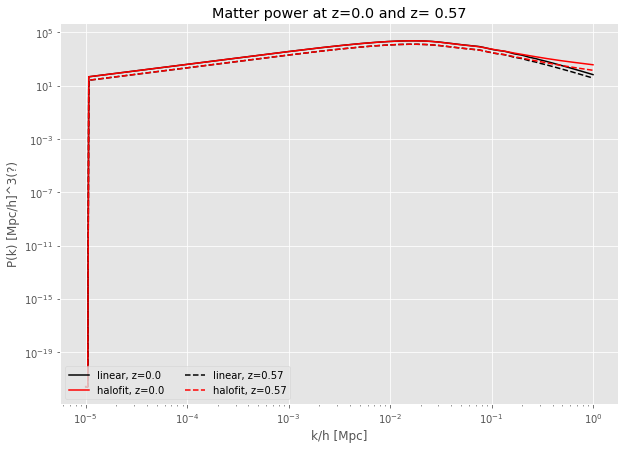

In [9]:
# Now make a plot
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,7))
for i, (redshift, line) in enumerate(zip(zs,['-','--'])):
    plt.loglog(kh, pk[i,:],color='k',ls=line,label='linear, z='+str(redshift))
    plt.loglog(kh_nonlin,pk_nonlin[i,:],color='r',ls=line,label='halofit, z='+str(redshift))
plt.xlabel('k/h [Mpc]');
plt.ylabel('P(k) [Mpc/h]^3(?)')
plt.legend(loc='lower left', ncol=2);
plt.title('Matter power at z=%s and z= %s'%tuple(zs));

In [10]:
# The galaxy power spectrum in real space would be (setting beta=0 in Kaiser below)
Pg_lin = b**2 * pk[1,:] # and then this would equal the monopole exactly, but we don't need this (other ls would be 0)
Pg_hf = b**2 * pk_nonlin[1,:] # this is just to plot - not useful for anything

# Get the 3D P(k) for later, when we will be adding FoG too
beta = f/b # just as a helper for the equations to look like in the Saito notes
Kaiser_factor = (1 + beta*mu**2)**2 # only mu-dependent
Pg_Kaiser = b**2 * np.outer(pk[1,:],Kaiser_factor)

# Now get the multipoles manually
P0_Kaiser = (1+2/3*beta+1/5*beta**2)*Pg_lin
P2_Kaiser = (4/3*beta+4/7*beta**2)*Pg_lin
P4_Kaiser = 8/35*beta**2*Pg_lin

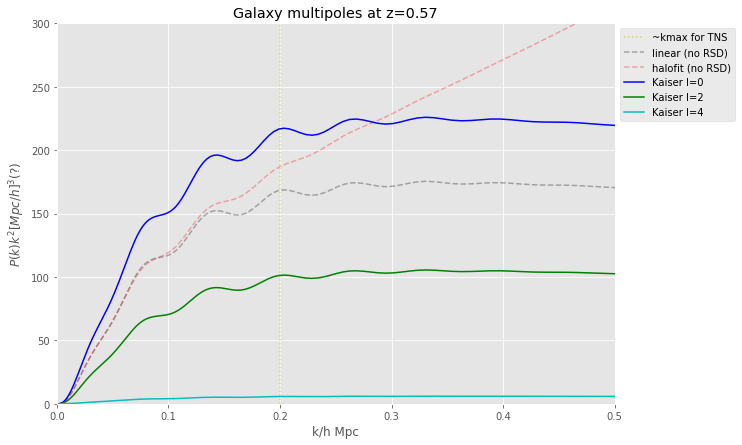

In [11]:
# Now make a plot
fig = plt.figure(figsize=(10,7))
plt.axvline(0.2,c='y',ls=':',alpha=0.5,label='~kmax for TNS')
plt.plot(kh,kh**2*Pg_lin,'k--',label='linear (no RSD)',alpha=0.3)
plt.plot(kh,kh**2*Pg_hf,'r--',label='halofit (no RSD)',alpha=0.3)
plt.plot(kh,kh**2*P0_Kaiser,'b',label='Kaiser l=0')
plt.plot(kh,kh**2*P2_Kaiser,'g',label='Kaiser l=2')
plt.plot(kh,kh**2*P4_Kaiser,'c',label='Kaiser l=4')
plt.xlabel('k/h Mpc')
plt.ylim([0,300])
plt.xlim([0,0.5])
plt.ylabel('$P(k)k^2 [Mpc/h]^3$(?)')
plt.legend(bbox_to_anchor=(1,1), ncol=1);
plt.title('Galaxy multipoles at z=%s'%z);



In [12]:


# We will need the velocity dispersion parameter to begin with. Let's take the linear one for now,
# although later we'd want it as a free parameter.
sigv = np.sqrt(1./6/np.pi**2 * np.trapz(pk[1,:],kh))
print(sigv) # This not converged, so set it manually to something I think might be close to converged.
sigv = 4.9 #<--- I have no idea if this is remotely correct!



4.216551879423167


In [13]:
# Now get the FoG factor and calculate the Pgg
x = np.outer(kh,mu)*f*sigv
FoG_L = 1./(1. + x**2)

Pg_fog = FoG_L*Pg_Kaiser

In [14]:
# Integrate over mu to get the multipoles
mlps = [0,2,4] # Which multipoles
Pkl_fog = [0,0,0]
Pkl_Kaiser = [0,0,0]
for i,l in enumerate(mlps):
    pref = 0.5*(2.*l+1.)
    
    # Kaiser to check against manual calculation above
    integrand = Pg_Kaiser * legendre(l)(mu)
    Pkl_Kaiser[i] = pref * np.trapz(integrand,x=mu,axis=1)
    
    # Now the full thing
    integrand = Pg_fog * legendre(l)(mu)
    Pkl_fog[i] = pref * np.trapz(integrand,x=mu,axis=1)



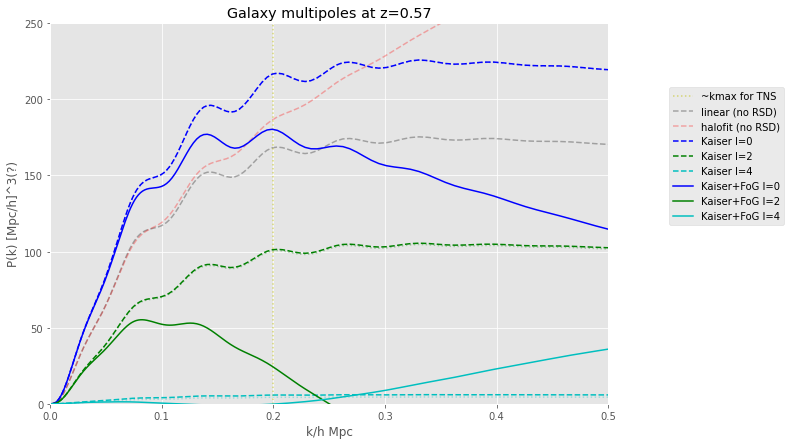

In [15]:

# Now add to above plot
fig = plt.figure(figsize=(10,7))
plt.axvline(0.2,c='y',ls=':',alpha=0.5,label='~kmax for TNS')
plt.plot(kh,kh**2*Pg_lin,'k--',label='linear (no RSD)',alpha=0.3)
plt.plot(kh,kh**2*Pg_hf,'r--',label='halofit (no RSD)',alpha=0.3)
plt.plot(kh,kh**2*P0_Kaiser,'b--',label='Kaiser l=0')
plt.plot(kh,kh**2*P2_Kaiser,'g--',label='Kaiser l=2')
plt.plot(kh,kh**2*P4_Kaiser,'c--',label='Kaiser l=4')

plt.plot(kh,kh**2*Pkl_Kaiser[0],'b:',alpha=0.3)
plt.plot(kh,kh**2*Pkl_Kaiser[1],'g:',alpha=0.3)
plt.plot(kh,kh**2*Pkl_Kaiser[2],'c:',alpha=0.3)
plt.plot(kh,kh**2*Pkl_fog[0],'b-',label='Kaiser+FoG l=0')
plt.plot(kh,kh**2*Pkl_fog[1],'g-',label='Kaiser+FoG l=2')
plt.plot(kh,kh**2*Pkl_fog[2],'c-',label='Kaiser+FoG l=4')


plt.xlabel('k/h Mpc')
plt.ylim([0,250])
plt.xlim([0,0.5])
plt.ylabel('P(k) [Mpc/h]^3(?)')
plt.legend(bbox_to_anchor=(1.1,0.65), ncol=1);
plt.title('Galaxy multipoles at z=%s'%z);



In [16]:
# Get the "observable"
Pgs_hf = FoG_L * np.outer(Pg_hf,Kaiser_factor)

# Integrate over mu again to get the multipoles
mlps = [0,2,4] # Which multipoles
Pkl_hf = [0,0,0]
for i,l in enumerate(mlps):
    pref = 0.5*(2.*l+1.)
    
    # Now the full thing
    integrand = Pgs_hf * legendre(l)(mu)
    Pkl_hf[i] = pref * np.trapz(integrand,x=mu,axis=1)

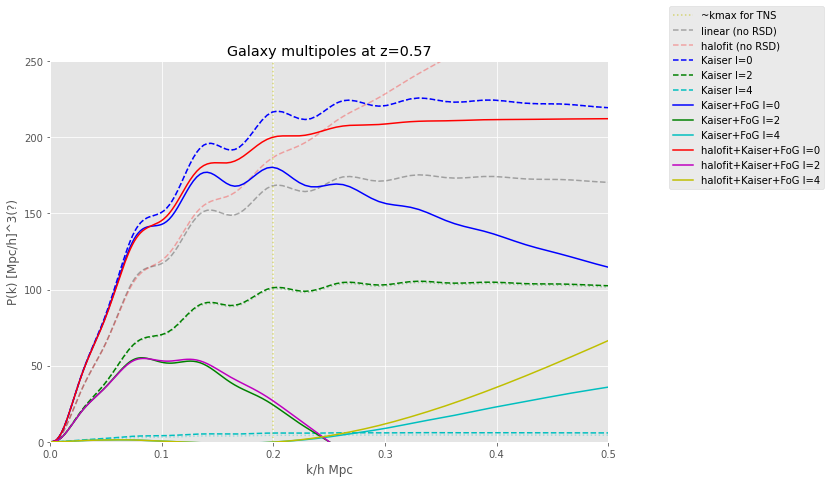

In [17]:

# Now add to the plot again
fig = plt.figure(figsize=(10,7))
plt.axvline(0.2,c='y',ls=':',alpha=0.5,label='~kmax for TNS')
plt.plot(kh,kh**2*Pg_lin,'k--',label='linear (no RSD)',alpha=0.3)
plt.plot(kh,kh**2*Pg_hf,'r--',label='halofit (no RSD)',alpha=0.3)
plt.plot(kh,kh**2*P0_Kaiser,'b--',label='Kaiser l=0')
plt.plot(kh,kh**2*P2_Kaiser,'g--',label='Kaiser l=2')
plt.plot(kh,kh**2*P4_Kaiser,'c--',label='Kaiser l=4')

plt.plot(kh,kh**2*Pkl_Kaiser[0],'b:',alpha=0.3)
plt.plot(kh,kh**2*Pkl_Kaiser[1],'g:',alpha=0.3)
plt.plot(kh,kh**2*Pkl_Kaiser[2],'c:',alpha=0.3)
plt.plot(kh,kh**2*Pkl_fog[0],'b-',label='Kaiser+FoG l=0')
plt.plot(kh,kh**2*Pkl_fog[1],'g-',label='Kaiser+FoG l=2')
plt.plot(kh,kh**2*Pkl_fog[2],'c-',label='Kaiser+FoG l=4')

plt.plot(kh,kh**2*Pkl_hf[0],'r-',label='halofit+Kaiser+FoG l=0')
plt.plot(kh,kh**2*Pkl_hf[1],'m-',label='halofit+Kaiser+FoG l=2')
plt.plot(kh,kh**2*Pkl_hf[2],'y-',label='halofit+Kaiser+FoG l=4')

plt.xlabel('k/h Mpc')
plt.ylim([0,250])
plt.xlim([0,0.5])
plt.ylabel('P(k) [Mpc/h]^3(?)')
plt.legend(bbox_to_anchor=(1.1,0.65), ncol=1);
plt.title('Galaxy multipoles at z=%s'%z);

## Transform $P_l$ to $\xi_l$

In [18]:
#Pktest = Pkl_fog[0]
xitest=[0,0,0]
r=[0,0,0]
for i in [0,1,2]:
  r[i],xitest[i]=mcfit.xi2P(kh,l=i*2)(Pkl_fog[i])

/usr/local/lib/python3.7/dist-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/usr/local/lib/python3.7/dist-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


[]

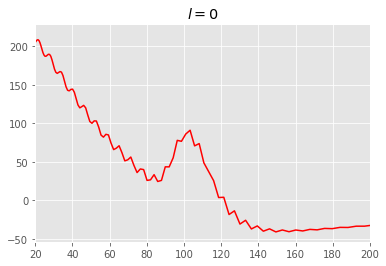

In [19]:
plt.plot(r[0],xitest[0]*r[0]**2/(4*np.pi**3),'r')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim([20,200])
#plt.ylim([-1,50])
plt.title(r"$l=0$")
plt.plot()

In [20]:
banana();

NameError: ignored

In [ ]:
plt.plot(r[1],xitest[1]*r[1],'g')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim([20,200])
#plt.ylim([-1,50])
plt.title(r"$l=2$")
plt.plot()

Hmmm, see also Fig 1 here: https://arxiv.org/pdf/1610.03506.pdf

In [ ]:
plt.plot(r[2],xitest[2]*r[2],'m')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim([20,200])
#plt.ylim([-1,50])
plt.title(r"$l=4$")
plt.plot()

## Trying nbodykit

In [ ]:
from nbodykit.lab import cosmology